In [3]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [4]:
!pip install ydata-ydata_profiling

ERROR: Could not find a version that satisfies the requirement ydata-ydata_profiling (from versions: none)
ERROR: No matching distribution found for ydata-ydata_profiling


In [5]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport

# 1. Loading the Data
train_df = pd.read_csv('train.csv')

# 2. Preprocessing
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.drop('WeightCategory')
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, dummy_na=False)

# Impute missing values
for col in train_df_encoded.columns:
    if train_df_encoded[col].isnull().any():
        if pd.api.types.is_numeric_dtype(train_df_encoded[col]):
            train_df_encoded[col] = train_df_encoded[col].fillna(train_df_encoded[col].median())
        else:
            train_df_encoded[col] = train_df_encoded[col].fillna(train_df_encoded[col].mode()[0])

# 3. Feature Engineering
train_df_encoded['BMI'] = train_df_encoded['Weight'] / (train_df_encoded['Height'] ** 2)

X = train_df_encoded.drop('WeightCategory', axis=1)
y = train_df_encoded['WeightCategory']

# EDA on Target Variable (y)
# Generate the profile report for the 'y' (WeightCategory) Series
profile_y = ProfileReport(y.to_frame(), title="WeightCategory (Target Variable) Profile")

print("Displaying Target Variable (y) Profile:")
profile_y.to_notebook_iframe()

# 5. Train-Test Split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training and Evaluation
rf_model_split = RandomForestClassifier(random_state=42)
rf_model_split.fit(X_train_split, y_train_split)

y_test_pred_split = rf_model_split.predict(X_test_split)
accuracy_split = accuracy_score(y_test_split, y_test_pred_split)

print(f"\nAccuracy on the test subset: {accuracy_split}")

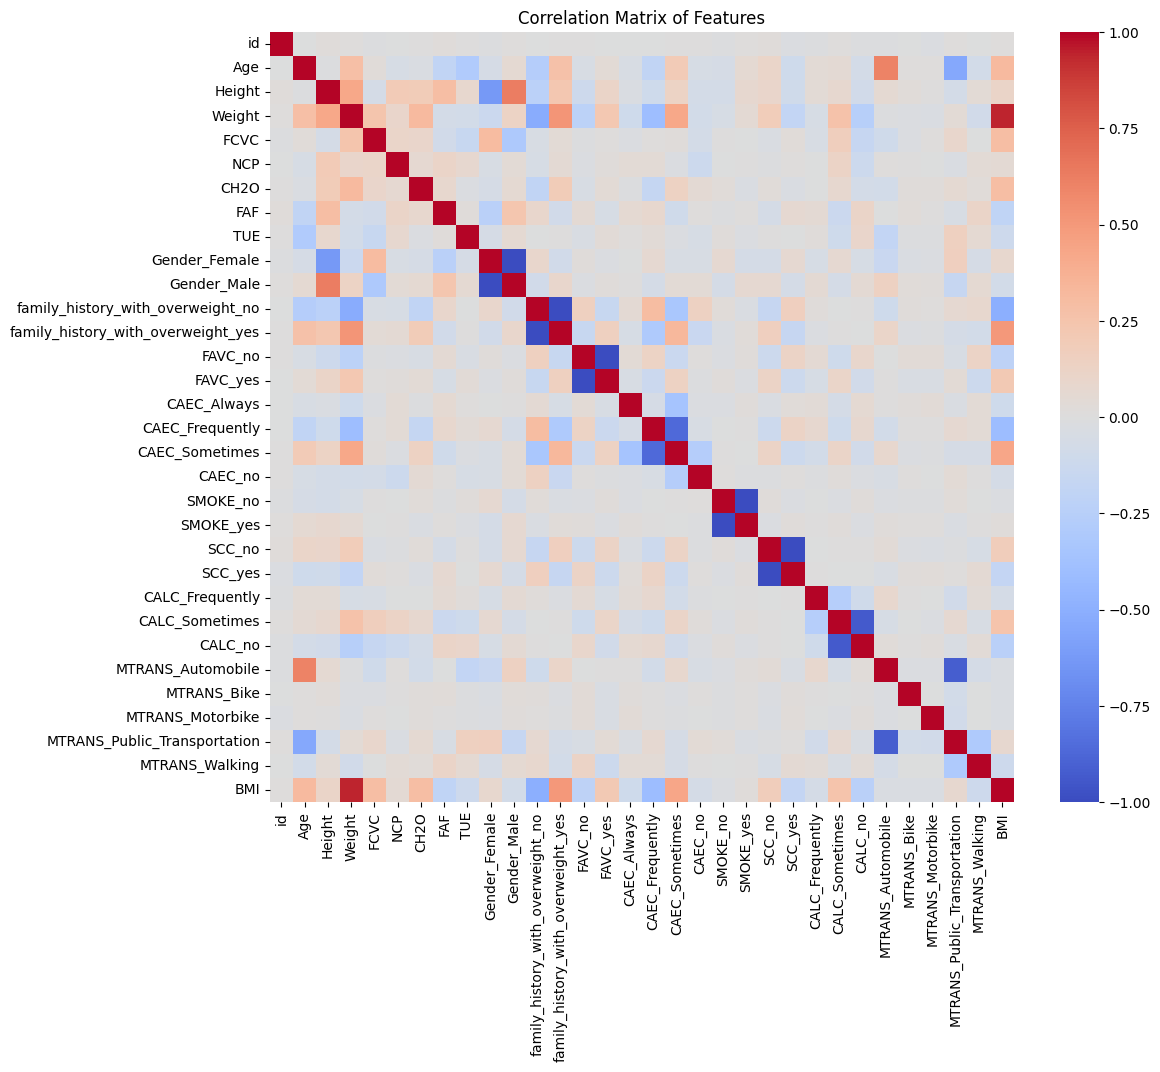

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_train_split.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test_split, y_test_pred_split)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.91      0.91       346
      Normal_Weight       0.86      0.87      0.86       496
     Obesity_Type_I       0.91      0.87      0.89       448
    Obesity_Type_II       0.96      0.97      0.96       464
   Obesity_Type_III       1.00      1.00      1.00       606
 Overweight_Level_I       0.79      0.77      0.78       384
Overweight_Level_II       0.78      0.84      0.81       363

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107

